# Lab: Titanic EDA

This week is all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic's passenger manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework

This is a fairly common 'toy' dataset (although it's definitely dirty) used for teaching cleaning and some modeling. You can find out more here: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

## Step 1: Reading the data

1. If you look at the dataset directory, you'll see a .csv and a .txt file. The .csv is your data. The .txt is a brief data dictionary.
2. Take a minute read the data dictionary and understand how the data is structured.
3. In this notebook, load the csv into pandas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# New Section

In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data['Survived'].unique()

array([0, 1])

In [ ]:
titanic_data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**Note**: The age column has some missing values

**Note**: Some ages less than 1. We are going to assume they are babies.

In [ ]:
titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
age_median = round(titanic_data['Age'].median(),2)
age_median

28.0

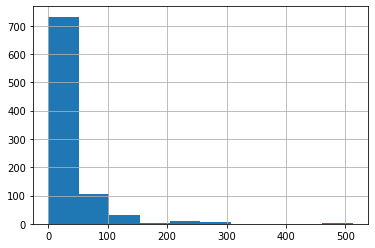

In [ ]:
titanic_data['Fare'].hist()

In [ ]:
titanic_data_negative_age = titanic_data.query('Age == 0.42') 

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data_negative_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [ ]:
204/891

0.22895622895622897

### Handle Missing Values
1. median imputation
2. Mean Imputation
3. Advanced Techniques.(KNN imputation, regression imputation)
4. Delete missing rows
5. Delete Column, 80% 

In [ ]:
titanic_data['Age'].fillna(age_median, inplace=True)
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data['Age'] = titanic_data['Age'].astype('int')

*Note*: We are rounding age values to nearest whole number*



In [ ]:
titanic_data.iloc[803]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                          0
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [ ]:
titanic_data['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [ ]:
titanic_data_negative_age = titanic_data.query('Age == 1') 

In [ ]:
titanic_data_negative_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1,2,1,230136,39.0000,F4,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1,1,2,C.A. 2315,20.5750,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1,0,2,S.C./PARIS 2079,37.0042,NaN,C


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#titanic_data_negative_age = titanic_data.query('Age < 1') 
#titanic_data_negative_age

In [ ]:
#titanic_data.drop(titanic_data_negative_age.index, inplace =True)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data = titanic_data.drop(columns ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000
887,1,1,female,19,0,0,30.0000
888,0,3,female,28,1,2,23.4500
889,1,1,male,26,0,0,30.0000


In [ ]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
titanic_data[titanic_data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38,0,0,80.0,NaN
829,1,1,female,62,0,0,80.0,NaN


In [ ]:
mode_emb = titanic_data['Embarked'].mode()[0]
mode_emb 

'S'

In [ ]:
titanic_data['Embarked'].fillna(mode_emb[0],inplace=True)

In [ ]:
#titanic_data["Embarked"].fillna(method="mode", inplace=True)

In [ ]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_data.dropna(inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [ ]:
titanic_data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
titanic_data.Survived == True

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
died = titanic_data.Survived == False

In [ ]:
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
titanic_data.Fare[survived].mean()

51.843205172413775

In [ ]:
titanic_data.Fare[died].mean()

22.965456367924514

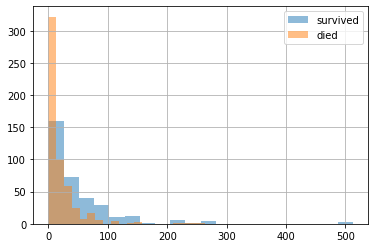

In [ ]:
titanic_data.Fare[survived].hist(alpha=0.5, bins=20, label='survived')
titanic_data.Fare[died].hist(alpha=0.5, bins=20, label='died')
plt.legend();

In [ ]:
titanic_data.groupby('Pclass').Survived.mean()


Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [ ]:
titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [ ]:
titanic_data.groupby('Pclass')['Pclass'].mean()

Pclass
1    1.0
2    2.0
3    3.0
Name: Pclass, dtype: float64

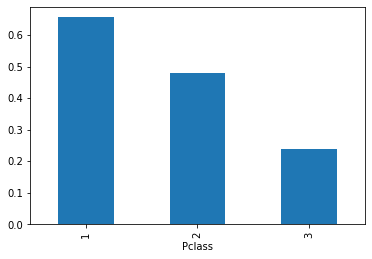

In [ ]:
#titanic_data.groupby('Pclass').Survived.mean().plot(kind= 'bar');

male      453
female    261
Name: Sex, dtype: int64

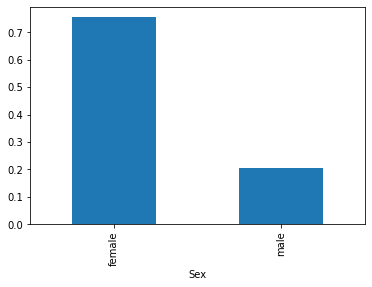

In [ ]:
#titanic_data.groupby('Sex').Survived.mean().plot(kind= 'bar');
#titanic_data.Sex.value_counts()

In [ ]:
#titanic_data.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         102
        1          85
        2          74
male    3         253
        1         101
        2          99
Name: Pclass, dtype: int64

In [ ]:
titanic_data.query('Sex == "female"')['Fare'].median(), titanic_data.query('Sex == "male"')['Fare'].median()


In [ ]:
titanic_data.groupby(['Pclass', 'Sex']).Survived.mean().unstack().plot(kind='bar');

In [ ]:
titanic_data.SibSp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.SibSp[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [ ]:
titanic_data.SibSp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived');

In [ ]:
titanic_data.Parch[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.Parch[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [ ]:
titanic_data.SibSp[survived].value_counts()

In [ ]:
titanic_data.Embarked[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.Embarked[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [ ]:
titanic_data.Age.isnull()

In [ ]:
titanic_data[titanic_data.Age.isnull()].hist(figsize=(10,8));
titanic_data.fillna(titanic_data.mean(), inplace=True)
titanic_data.info()

titanic_data[titanic_data.Embarked.isnull()]
titanic_data.dropna(inplace=True)
titanic_data.info()

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

## Step 5: Plotting
1. Using matplotlib and/or seaborn, create some charts from this data.


Mounted at /content/drive
